In [1]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt


base_dir = os.getcwd()
file = 'data/entire_field_raw_3_class/walking/train/entire_field_raw_walk1.pkl'
sample_file_path = os.path.join(base_dir,file)

bg_noise = 'data/03_09_2024_bg_noise/bg_noise6.pkl'
bg_noise_path = os.path.join(base_dir, bg_noise)


In [2]:
with open(sample_file_path, 'rb') as sample_file_path:
    data = pickle.load(sample_file_path)

with open(bg_noise_path, 'rb') as bg_noise_path:
    bg_noise = pickle.load(bg_noise_path)

In [3]:
points = np.vstack(data)
bg_noise = np.vstack(bg_noise)

In [4]:
print(len(points))
print(points[:5,])

619
[[  0.71     4.543    1.303    0.     159.    ]
 [  1.992    3.877    2.018    0.     128.    ]
 [  0.7046   3.709    1.165    0.     128.    ]
 [  2.174    2.74     1.045    0.     179.    ]
 [  0.71     4.56     1.299    0.     157.    ]]


In [5]:
print(len(bg_noise))
print(points[:5,])

394
[[  0.71     4.543    1.303    0.     159.    ]
 [  1.992    3.877    2.018    0.     128.    ]
 [  0.7046   3.709    1.165    0.     128.    ]
 [  2.174    2.74     1.045    0.     179.    ]
 [  0.71     4.56     1.299    0.     157.    ]]


In [6]:
x_points = points[:,0]
y_points = points[:,1]
z_points = points[:,2]

bg_x = bg_noise[:,0]
bg_y = bg_noise[:,1]
bg_z = bg_noise[:,2]

Text(0.5, 0, 'Z')

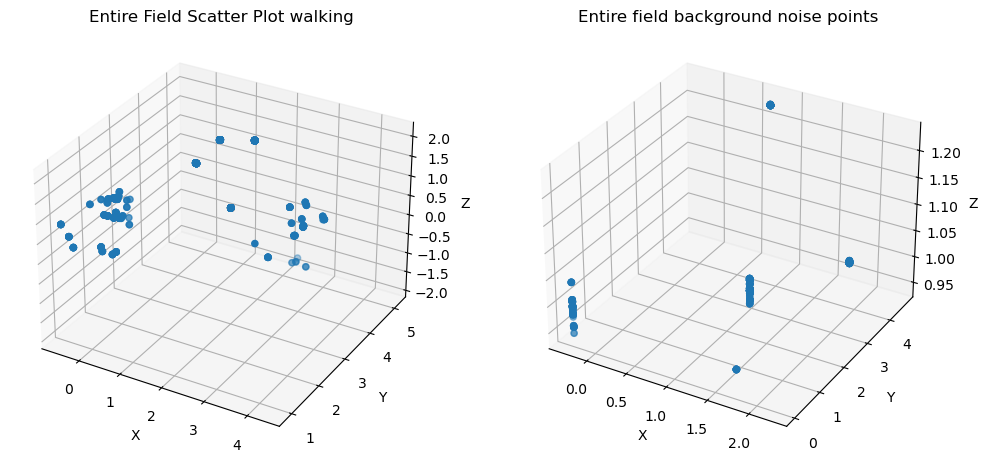

In [7]:
fig, (ax, ax1) = plt.subplots(1,2, subplot_kw={'projection': '3d'}, figsize=(12,6))
ax.scatter(x_points,y_points,z_points)
ax.set_title('Entire Field Scatter Plot walking')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax1.scatter(bg_x, bg_y, bg_z)
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [8]:
def background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for point in current_frame_data:
        distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
        if np.min(distances) > threshold:
            filtered_data.append(point)
        else:
            num_points_removed +=1
            points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data), np.array(points_removed)
        

In [9]:
def unstacked_background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for point in current_frame_data:
        distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
        if np.min(distances) > threshold:
            filtered_data.append(point)
        else:
            num_points_removed +=1
            points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data), np.array(points_removed)
        

In [10]:
filtered_points,points_removed = background_subtraction(bg_noise, points, threshold=0.1)

points removed: 80


(-1.888671875, 2.060546875)

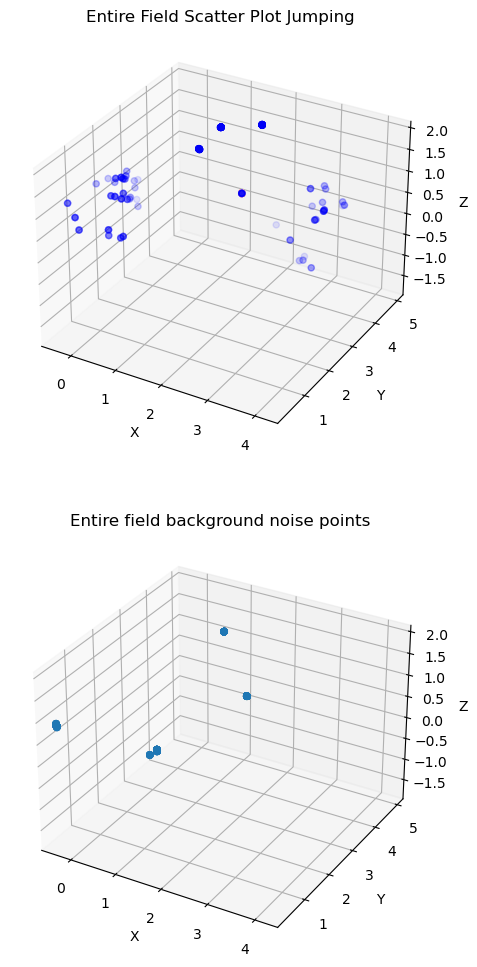

In [11]:
fig, (ax, ax1) = plt.subplots(2,1, subplot_kw={'projection': '3d'}, figsize=(8,12))
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='pink', alpha=1, label='Points Removed')
ax.scatter(filtered_points[:,0],filtered_points[:,1],filtered_points[:,2], color='blue', alpha=0.1, label='Filtered Points')

ax.set_title('Entire Field Scatter Plot Jumping')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the same x and y limits for both plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

ax1.scatter(bg_x, bg_y, bg_z)
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)

In [12]:
#find average energy strength of points that weren't filtered
np.mean(filtered_points[:,4])
#find average energy strength of points that were filtered out
np.mean(points_removed[:,4])
#average energy strength of background noise
np.mean(bg_noise[:,4])

158.8

In [13]:
from glob import glob
##create array
bg_noise_merge = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        bg_noise_merge.append(data)
bg_noise_merge = np.vstack(bg_noise_merge)

#open file and merge to array
#store array in new file with entire merged bgnoise data


In [14]:
print(bg_noise_merge)

[[ 7.397e-01  4.723e+00  1.267e+00  0.000e+00  1.970e+02]
 [ 2.260e+00  2.760e+00  1.114e+00  0.000e+00  1.640e+02]
 [ 4.944e-01  1.211e-01  8.691e-01  0.000e+00  1.260e+02]
 ...
 [ 4.944e-01  1.289e-01  8.584e-01  0.000e+00  1.250e+02]
 [-1.237e+00  6.523e-01  2.832e-01  0.000e+00  1.260e+02]
 [ 1.584e+00 -7.812e-02  1.413e+00  0.000e+00  1.260e+02]]


In [15]:
file_path = 'data/03_09_2024_katie_pc_bg_noise/all_samples_merged.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(bg_noise_merge, file)


In [16]:
bg_noise_merge.shape

(100031, 5)

In [17]:

def track_background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    corresponding_bg_point = []
    num_points_removed = 0
    
    for point in current_frame_data:
        # Calculate distances between the current frame point and all background points
        distances = np.linalg.norm(background_data[:, :3] - point[:3], axis=1)
        
        # Find the minimum distance and the index of the corresponding background point
        min_distance_idx = np.argmin(distances)
        
        if distances[min_distance_idx] > threshold:
            filtered_data.append(point)  # Keep this point if the distance is larger than the threshold
        else:
            num_points_removed += 1
            points_removed.append(point)  # Mark this point as removed
            corresponding_bg_point.append(background_data[min_distance_idx])  # Append the corresponding background point
    
    print(f"Points removed: {num_points_removed}")
    
    # Return filtered points, removed points, and their corresponding background points
    return (
        np.array(filtered_data), 
        np.array(points_removed), 
        np.array(corresponding_bg_point)
    )


In [18]:
filtered_points,points_removed = background_subtraction(bg_noise_merge, points, threshold=0.1)

points removed: 100


In [19]:
filtered_points,points_removed, corresponding_bg_point = track_background_subtraction(bg_noise_merge, points, threshold=0.2)

Points removed: 300


In [20]:
print(f"points_removed {points_removed[90:100,:3]}")
print(f"corresponding3 {corresponding_bg_point[0:1,]}")

points_removed [[0.71  4.543 1.303]
 [1.992 3.877 2.02 ]
 [2.174 2.74  1.045]
 [0.71  4.543 1.303]
 [1.992 3.879 2.016]
 [2.174 2.74  1.044]
 [0.71  4.55  1.301]
 [1.992 3.877 2.021]
 [2.174 2.742 1.042]
 [0.71  4.555 1.299]]
corresponding3 [[  0.71    4.695   1.271   0.    200.   ]]


(-1.888671875, 2.060546875)

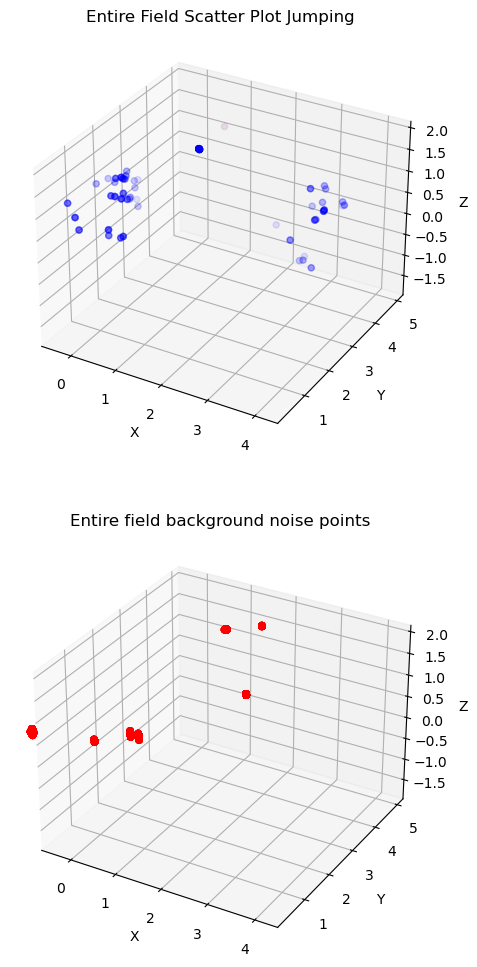

In [21]:
fig, (ax, ax1) = plt.subplots(2,1, subplot_kw={'projection': '3d'}, figsize=(8,12))
ax.scatter(filtered_points[:,0],filtered_points[:,1],filtered_points[:,2], color='blue', alpha=0.1, label='Filtered Points')
# ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='pink', alpha=0.3, label='Points Removed')
ax.scatter(corresponding_bg_point[0:1,0], corresponding_bg_point[0:1,1], corresponding_bg_point[0:1,2], color='purple', alpha=0.1, label='points_removed')
ax.set_title('Entire Field Scatter Plot Jumping')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Set the same x and y limits for both plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)



ax1.set_title("Entire field background noise points")
ax1.scatter(bg_noise_merge[:,0], bg_noise_merge[:,1], bg_noise_merge[:,2], color='red', alpha=0.3, label='points_removed')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)

In [22]:
print(f"x_lim is {x_lim}")
print(f"y_lim is {y_lim}")
print(f"z_lim is {z_lim}")

x_lim is (-0.5635, 4.37)
y_lim is (0.03125, 5.16)
z_lim is (-1.889, 2.06)


No handles with labels found to put in legend.


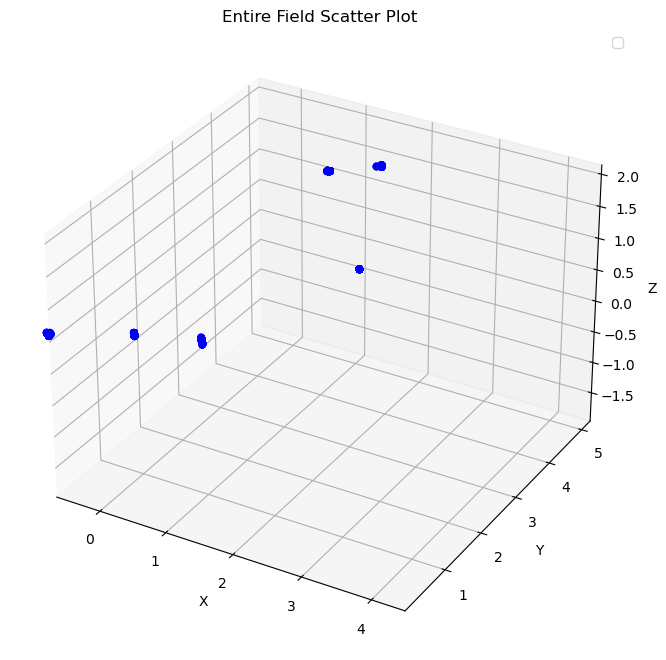

In [23]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_lab_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# # Set axis limits (optional, based on your previous code)
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# zlim = ax.get_zlim()

# Show legend
ax.legend()

plt.show()

(-0.5635, 4.37)


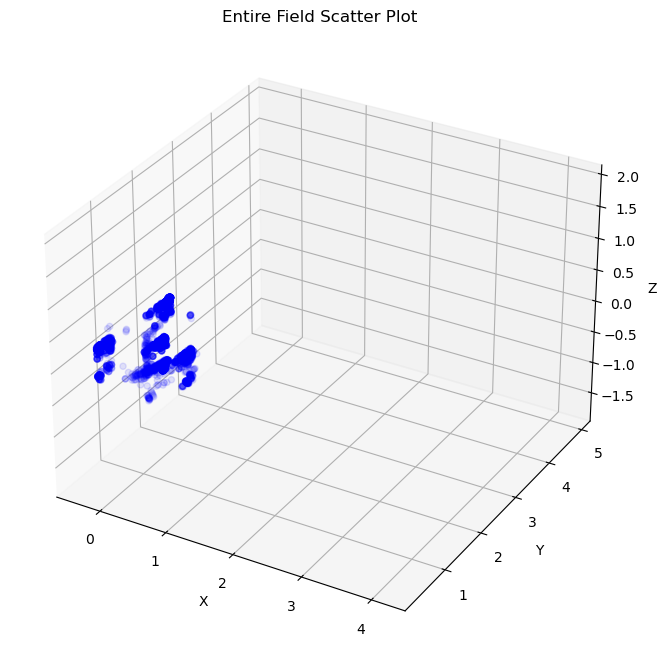

In [24]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/13_08_2024_yang_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)


fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
print(x_lim)

Text(0.5, 0, 'Z')

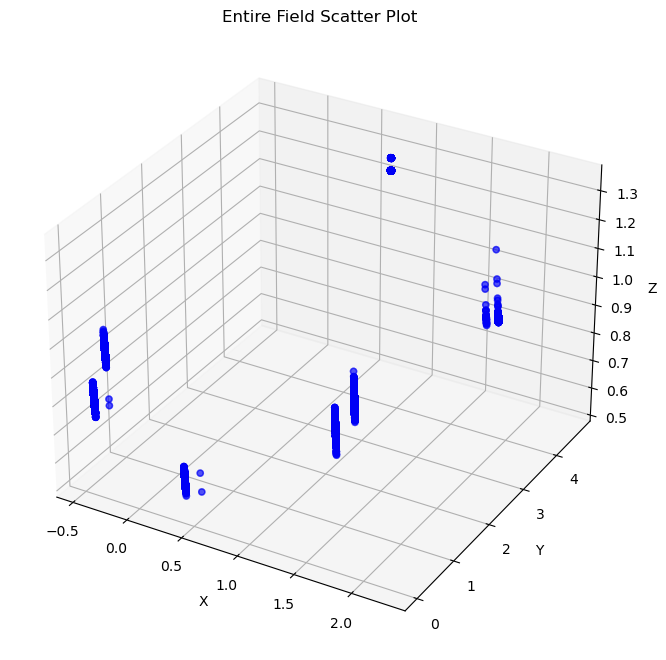

In [25]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 0, 'Z')

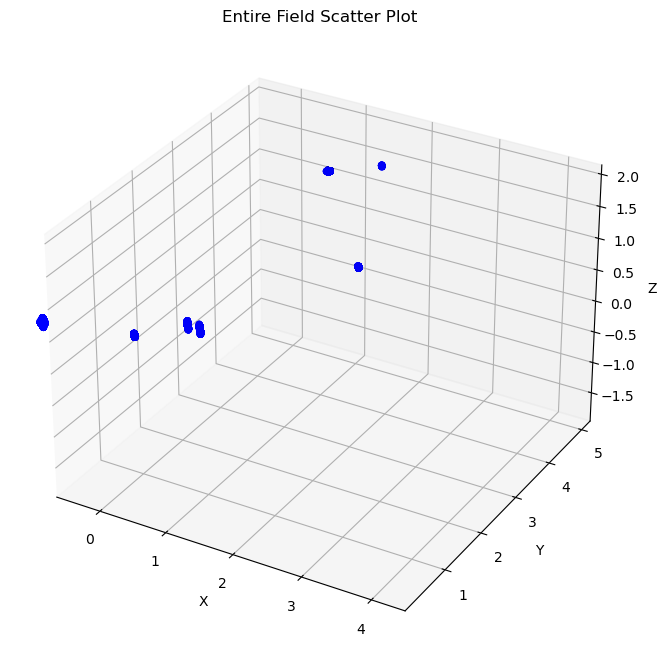

In [26]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 0, 'Z')

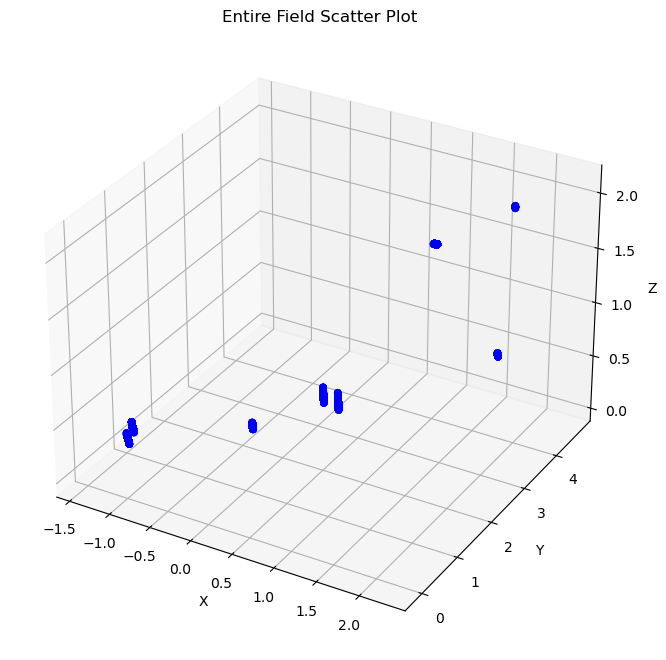

In [27]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

(-1.888671875, 2.060546875)

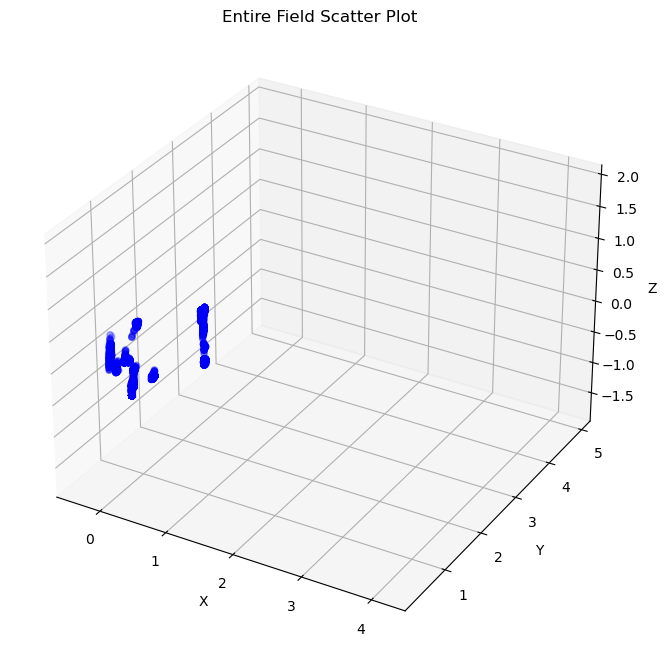

In [28]:
lab_pc_bgnoise = []
#specify bg noise path
#each frame group is normalised
bg_noise_folder = 'data/03_09_2024_katie_pc_norm_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)